<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Classification of Weather Data using Decision Trees
</p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Daily Weather Data Analysis</p>

In this notebook, we will use scikit-learn to perform a decision tree based classification of weather data.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Importing the Necessary Libraries<br></p>

In [395]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Creating a Pandas DataFrame from a CSV file<br></p>


In [397]:
data = pd.read_csv('daily_weather.csv')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Daily Weather Data Description</p>


The file **daily_weather.csv** is a comma-separated file that contains weather data.  This data comes from a weather station located in San Diego, California.  The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.<br><br>
Let's now check all the columns in the data.

In [399]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [400]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


<br>Each row in daily_weather.csv captures weather data for a separate day.  <br><br>
Sensor measurements from the weather station were captured at one-minute intervals.  These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon.  The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)


In [402]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


### Checking Null Values
1. How many columns have null values?
2. How many rows have null values?
3. remove the rows with null values.
4. Verify that null values are dropped.

In [404]:
data.isnull().any()

number                    False
air_pressure_9am           True
air_temp_9am               True
avg_wind_direction_9am     True
avg_wind_speed_9am         True
max_wind_direction_9am     True
max_wind_speed_9am         True
rain_accumulation_9am      True
rain_duration_9am          True
relative_humidity_9am     False
relative_humidity_3pm     False
dtype: bool

In [405]:
data.isnull().any(axis = 1)

0       False
1       False
2       False
3       False
4       False
        ...  
1090    False
1091    False
1092    False
1093    False
1094    False
Length: 1095, dtype: bool

In [406]:
#any rows with null values?
filterRowWithNull = data.isnull().any(axis = 1)
data[filterRowWithNull].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


In [407]:
data[data.isnull().any(axis=1)].shape

(31, 11)

In [408]:
data.shape

(1095, 11)

Now let's drop null values using the pandas **dropna** function.

In [410]:
before_rows = data.shape[0]
print(before_rows)

1095


In [411]:
#dropping rows with at least one NaN
data = data.dropna()
data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


In [412]:
after_rows = data.shape[0]
print(after_rows)

1064


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
How many rows dropped due to cleaning?<br><br></p>


In [414]:
before_rows - after_rows

31

In [415]:
data.shape

(1064, 11)

In [416]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Further Data Cleaning <br></p>

We will not need to number for each row so we can clean it.

In [418]:
del data['number']
print(data.shape)

(1064, 10)


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Convert to a Classification Task <br></p>
Let's predict/classify the relative humidity values at 3pm by using some of the 9am sensor signals. <br>

Since a classification task predicts a categorical output, and relative_humidity_3pm currently is a numerical type, let's **binarize the relative_humidity_3pm to 0 or 1** -- if the humidity > 24.99, then we set it to 1; otherwise 0. <br>

**Inputs (features)**: all 9am sensor data features except for `relative_humidity_9am` . <br>
**Output**: humidity level @3pm (1 or 0)


In [420]:
data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [421]:
#unit for relative_humidity_3pm is a percent.
data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [422]:
print (False * 1)

0


In [423]:
print (True * 1)

1


In [424]:
data['relative_humidity_3pm'] > 24.99

0        True
1       False
2       False
3       False
4        True
        ...  
1090     True
1091     True
1092     True
1093     True
1094    False
Name: relative_humidity_3pm, Length: 1064, dtype: bool

In [425]:
clean_data = data.copy()
# The "*1" below converts a boolean type to a int type
print(clean_data['relative_humidity_3pm'] > 24.99)
print("--------")
print((clean_data['relative_humidity_3pm'] > 24.99)*1)
print("--------")
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99)*1
clean_data.head()

0        True
1       False
2       False
3       False
4        True
        ...  
1090     True
1091     True
1092     True
1093     True
1094    False
Name: relative_humidity_3pm, Length: 1064, dtype: bool
--------
0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: relative_humidity_3pm, Length: 1064, dtype: int64
--------


,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Output: Target is stored in a separate dataframe 'y'.
<br><br></p>


In [427]:
y=clean_data[['high_humidity_label']].copy()
#print(y)
print(type(y))
#TODO: replace the "[[" with "[" and check the type of y again. What is it?  
#print(type(clean_data['high_humidity_label']))
y.head()

<class 'pandas.core.frame.DataFrame'>


,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [428]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [429]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Inputs: Features are stored in a separate dataframe X <br></p>

### Choose a subset of all 9am features, excluding 'relative_humidity_9am', to use as the features for `X`.


In [431]:
clean_data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


In [432]:
data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

### Choose a subset of 9am sensor data.

In [434]:
#morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
#       'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
#        'rain_duration_9am']

In [435]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_speed_9am',
       'max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am','relative_humidity_9am']

In [436]:
X = clean_data[morning_features].copy()

In [437]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_speed_9am',
       'max_wind_speed_9am', 'rain_accumulation_9am', 'rain_duration_9am',
       'relative_humidity_9am'],
      dtype='object')

In [438]:

y.columns

Index(['high_humidity_label'], dtype='object')

In [439]:
X.shape

(1064, 7)

In [440]:
y.shape

(1064, 1)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> <br>
Perform Test and Train split
<br></p>



## REMINDER: Training Phase

In the **training phase**, the learning algorithm uses the training data to adjust the model’s parameters to minimize errors.  At the end of the training phase, you get the trained model.

<img src="Images/TrainingVSTesting.png" align="middle" style="width:350px;height:200px;"/>
<br>

In the **testing phase**, the trained model is applied to test data.  Test data is separate from the training data, and is previously unseen by the model.  The model is then evaluated on how it performs on the test data.  The goal in building a classifier model is to have the model perform well on training as well as test data.


### Split Dataset into training set and testing set <br>
For example 67% for training and 33% for testing. <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" width = 200> document for sklearn.model_selection.train_test_split() </a>

In [444]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [445]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 7)
(712, 1)
(352, 7)
(352, 1)


In [446]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [447]:
X_train.head()

,air_pressure_9am,air_temp_9am,avg_wind_speed_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
841,918.370000,72.932000,2.013246,2.773806,0.0,0.0,8.810000
75,920.100000,53.492000,13.444009,15.367778,0.0,0.0,31.470000
95,927.610000,54.896000,4.988376,7.202947,0.0,0.0,13.510000
895,919.235153,65.951112,2.942019,3.658810,0.0,0.0,14.073504
699,919.888128,68.687822,3.960858,5.185547,0.0,0.0,14.492839


In [448]:
y_train.describe()

,high_humidity_label
count,712.000000
mean,0.494382
std,0.500320
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Fit on the Train Set (Model building, e.g., creating the decision tree)</p>

 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier


In [450]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

#humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=5, max_depth = 5, random_state=0)

In [451]:
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=0)

In [452]:
#Build the model, creating a decision tree, which is defined by the humidity_classifier.
humidity_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [453]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Predict on Test Set 
</p>


In [455]:
X_test.shape

(352, 7)

In [456]:
predictions = humidity_classifier.predict(X_test)

In [457]:
type(predictions)

numpy.ndarray

In [458]:
predictions[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [459]:
#y_test holds output values for the X_test set
y_test['high_humidity_label'][:10].values

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Measure Accuracy of the Classifier
<br></p>

Compare predicted y values with actual y values from the test set and calculate accuracy.

In [461]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9119318181818182

### The Training and Testing Process
<img src="Images/TrainingTesting_Process.png" align="middle" style="width:650px"/>
<br>

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
Practice
</p>
1. Change some hyperparameters of DecisionTreeClassifier, e.g., criterion, splitter, max_depth, etc, re-train and te-test the model and what is the result? <br>

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html <br>
2. Change *morning_features*, re-train and te-test the model and what is the result?
<p>


## 1. Change some hyperparameters of DecisionTreeClassifier


## 2. Adding "relative_humidity_9am"  from the feature set.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Plot the Decision Tree
<br><br></p>



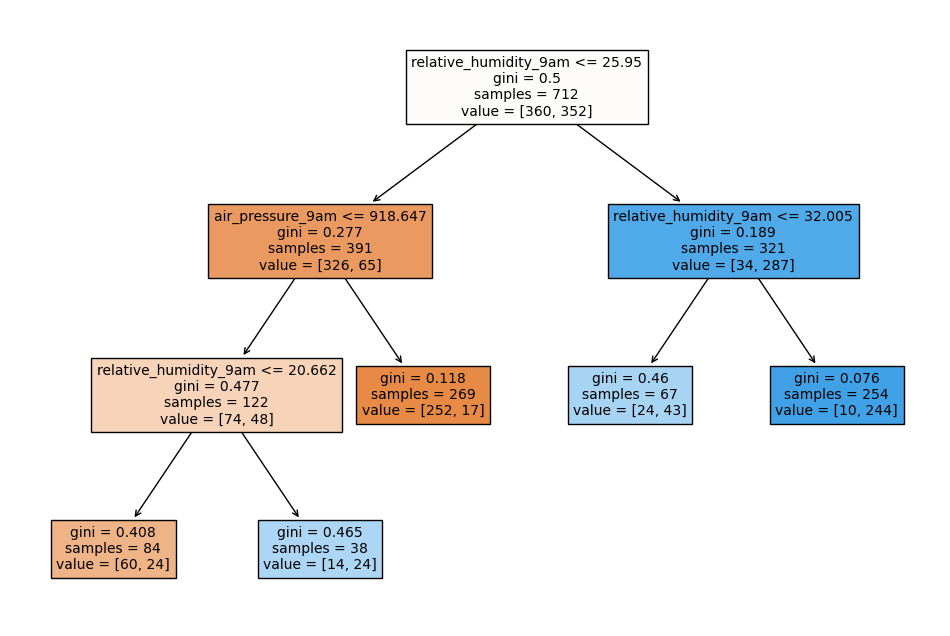

In [467]:
import matplotlib.pyplot as plt
from sklearn import tree

# Resize the plotting window
plt.figure(figsize=[12, 8])

# Plot the decision tree
p = tree.plot_tree(humidity_classifier, feature_names=X.columns, filled=True, fontsize=10)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Feature Importance
</p>

Decision tree classifier model has an attribute `feature_importances_` that reflects how valuable each feature is in reducing impurity during training (tree construction). 
- It returns an array of normalized scores (summing to 1), where higher values indicate greater importance.
- Features not used in any splits will have a score of 0.
- It works for tree-based models.

**Compared to other methods:**

| Method                  | Works With            | How it works                                       |
|------------------------|-----------------------|----------------------------------------------------|
| `.feature_importances_`| Tree-based models     | Based on impurity reduction during training        |
| `.coef_`               | Linear models         | Based on learned weights                           |
| Permutation importance |  Any model (KNN, SVM, etc.) | Based on performance drop when feature is shuffled |


                 Feature  Importance
6  relative_humidity_9am    0.917575
0       air_pressure_9am    0.082425
1           air_temp_9am    0.000000
2     avg_wind_speed_9am    0.000000
3     max_wind_speed_9am    0.000000
4  rain_accumulation_9am    0.000000
5      rain_duration_9am    0.000000


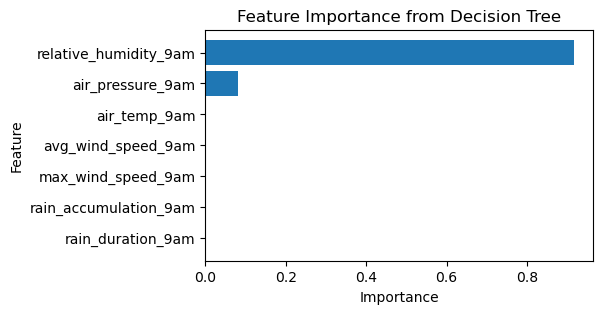

<Figure size 640x480 with 0 Axes>

In [469]:
feature_names = X_train.columns  # If X_train is a DataFrame

# Get feature importances
importances = humidity_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Plot the importances
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()
plt.show()

# Save the plot to a file
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Permulation Importance
</p>

 `permulation importance` is another way to measure feature importance
- It measures how much a model’s performance drops when a single feature’s values are randomly shuffled, and it works by evaluating the impact of each feature on the model’s predictive power.
- It is model-agnostic — it can be used with any model, including KNN. 
- It is recommended to be used on the test set.

                 Feature  Importance Mean  Importance Std
6  relative_humidity_9am         0.382955        0.023003
0       air_pressure_9am         0.026705        0.007430
1           air_temp_9am         0.000000        0.000000
2     avg_wind_speed_9am         0.000000        0.000000
3     max_wind_speed_9am         0.000000        0.000000
4  rain_accumulation_9am         0.000000        0.000000
5      rain_duration_9am         0.000000        0.000000


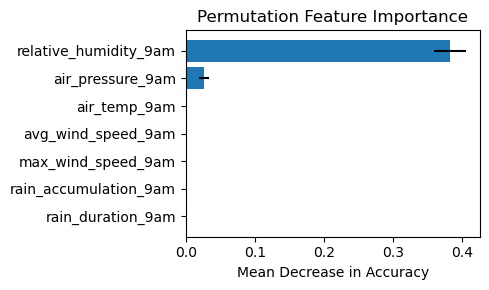

In [471]:
from sklearn.inspection import permutation_importance

# Perform permutation importance on the test set
result = permutation_importance(humidity_classifier, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Show results
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X_test.columns,  # assuming you used a DataFrame
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)

print(importance_df)

# Plot the results
plt.figure(figsize=(5, 3))
plt.barh(importance_df['Feature'], importance_df['Importance Mean'], xerr=importance_df['Importance Std'])
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()
